# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

# To display a dta frame in a tabular format.
from IPython.display import display
import warnings
warnings.filterwarnings("ignore") # To ignore warning messages while executing the code.

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples):
### STUDENT START ###
    for i in range(num_examples): # Looping through num_examples to display training example along with label
        print('############# Training Example: {}; Label Name: {} #############'.format(i+1, newsgroups_train.target_names[train_labels[i]]))
        print(train_data[i], '\n') # Printing ith training example    
### STUDENT END ###
P1(5)


############# Training Example: 1; Label Name: comp.graphics #############
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

############# Training Example: 2; Label Name: talk.religion.misc #############


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 19

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
def P2():
### STUDENT START ###
    vectorizer = CountVectorizer() # Assigning CountVectorizer class to a variable
    X = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X'
# a. 
    print("2.a")
    print("Size of the vocabulary:", X.shape[1]) # The size of the vocabulary
    print("The average number of non-zero features per example:", X.nnz/X.shape[0])  # Number of non-zero features / Number of rows
    print("Fraction of the entries in the matrix that are non-zero:", X.nnz/(X.shape[0]*X.shape[1]), "\n") # Number of non-zero features / Total entries in the matrix (rows * columns)
         
# b.
    print("2.b")
    print("First feature string:", vectorizer.get_feature_names()[0]) # First indexed feature string
    print("Last feature string:", vectorizer.get_feature_names()[-1], "\n") # Last indexed feature string    
       
# c.
    print("2.c")
    vocab = ["atheism", "graphics", "space", "religion"] # Assigning custom vocabulary to 'voacb' variable
    cust_vectorizer = CountVectorizer(vocabulary = vocab) # Passing 'vocab' as an input argument for the CountVectorizer Class
    X = cust_vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X'
    print("Size of the vocabulary:", X.shape[1]) # Shape of the count_vector with vocab = ["atheism", "graphics", "space", "religion"]  
    print("Is shape of the counter vector same as the length of the custom vocaubulary? ", X.shape[1] == len(vocab)) # Checking if the 'vocab' length is same as the 'features' length
    print("The average number of non-zero features per example:", X.nnz/X.shape[0], "\n") # Number of non-zero features / Number of rows
       
# d.
    print("2.d")
    ngram_range =  (2,3) # Including bigram and trigram characters for the feature vectors
    cust_vectorizer = CountVectorizer(analyzer = 'char', ngram_range = ngram_range) # 'character' and 'ngram_ranger' as input arguments for the CountVectorizer Class
    X = cust_vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X'
    print("Size of the vocabulary:", X.shape[1]) # Shape of the count vector with bigram and trigram characters 
    print("The average number of non-zero features per example:", X.nnz/X.shape[0], "\n") # Number of non-zero features / Number of rows
       
# e.
    print("2.e")
    min_df =  10 # setting 'minimum document frequency' to 10 
    cust_vectorizer = CountVectorizer(min_df = min_df) # 'min_df' as an input argument for the CountVectorizer Class
    X = cust_vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X'
    print("Size of the vocabulary:", X.shape[1]) # Shape of the count vector with 'minimum document frequency' value as 10 
    print("The average number of non-zero features per example: {}".format(X.nnz/X.shape[0]), "\n") # Number of non-zero features / Number of rows 
       
# f.
    print("2.f")
    vectorizer = CountVectorizer() # Assigning CountVectorizer class to a variable
    X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    vocab = vectorizer.get_feature_names() # extracting the vocabulary (feature names) that was generated by the model on train data
    print("Size of the vocabulary:", len(vocab)) # Size of the vocabulary generated by the model on train data
    frac_nnz_train_data = X_train.nnz/(X_train.shape[0]*X_train.shape[1]) # Number of non-zero features / Total entries in the matrix (rows * columns)
    print("Fraction of the entries in train data that are non-zero: {}".format(frac_nnz_train_data)) # Number of non-zero features / Total entries in the matrix (rows * columns)
    
    # We can use above 'vocab' which was genrated by fit_transforming train_data
    # and Transform the dev_data to see the difference in
    # 'fraction of the entries in that are non-zero' for both train and dev data.
    X_dev = vectorizer.transform(dev_data) # Transforming the dev_data and storing in variable 'X_dev'    
    frac_nnz_dev_data = X_dev.nnz/(X_dev.shape[0]*X_dev.shape[1]) # Number of non-zero features / Total entries in the matrix (rows * columns)
    print("Fraction of the entries in dev data that are non-zero: {}".format(frac_nnz_dev_data)) # Number of non-zero features / Total entries in the matrix (rows * columns)
    print('Absolute difference of fraction_of_non_zero_values in dev and train data: {}'.format(abs(frac_nnz_train_data-frac_nnz_dev_data)))
        
### STUDENT END ###
P2()

2.a
Size of the vocabulary: 26879
The average number of non-zero features per example: 96.70599803343165
Fraction of the entries in the matrix that are non-zero: 0.0035978272269590263 

2.b
First feature string: 00
Last feature string: zyxel 

2.c
Size of the vocabulary: 4
Is shape of the counter vector same as the length of the custom vocaubulary?  True
The average number of non-zero features per example: 0.26843657817109146 

2.d
Size of the vocabulary: 35478
The average number of non-zero features per example: 684.1917404129794 

2.e
Size of the vocabulary: 3064
The average number of non-zero features per example: 72.67600786627335 

2.f
Size of the vocabulary: 26879
Fraction of the entries in train data that are non-zero: 0.0035978272269590263
Fraction of the entries in dev data that are non-zero: 0.0038445908477417203
Absolute difference of fraction_of_non_zero_values in dev and train data: 0.000246763620782694


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [5]:
def P3():
### STUDENT START ###
    # Feature extraction for modeling the classifiers
    vectorizer = CountVectorizer() # Assigning the default CountVectorizer class to a variable
    X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    X_dev =  vectorizer.transform(dev_data) # Transforming the dev_data and storing in variable 'X_dev'
    vocab = vectorizer.get_feature_names() # Extracting the vocabulary (feature names) that was generated by the model on train data
    
    # k nearest neighbors classifier
    knn = KNeighborsClassifier() # Assigning KNeighborsClassifier Class to a variable
    knn.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = knn.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro') # F1 score on dev data
    print('F1 score of KNN Classifier on dev data: {}'.format(F1_score))
    # Grid search for the optimal value of 'k'
    knn_clf_search = GridSearchCV(knn, {'n_neighbors': [x for x in range(5, 100, 5)]}) # Assiging the GridSearchCV Class (with 'k' values= 5,10,15,..95) 
    knn_clf_search.fit(X_train, train_labels) # Fitting the tain_data and train_labels to the GridSearch
    print("The best 'k' value for KNN Classifier is: {} \n The best score is: {} \n\n".format(knn_clf_search.best_params_, knn_clf_search.best_score_) )

    # Multinomial Naive Bayes classifier
    MultinomialNB_clf =  MultinomialNB() # Assigning MultinomialNB Class to a variable
    MultinomialNB_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = MultinomialNB_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    print('F1 score of Multinomial Naive Bayes Classifier on dev data:'.format(F1_score))
    # Grid search for the optimal value of 'alpha'    
    MultinomialNB_clf_search = GridSearchCV(MultinomialNB_clf, {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}) # Assiging the GridSearchCV Class (with alpha values)
    MultinomialNB_clf_search.fit(X_train, train_labels) # fitting the tain_data and train_labels for the Grid Search
    print("The best 'alpha' value for MultinomialNB Classifier is: {} \n The best score is: {} \n\n".format(MultinomialNB_clf_search.best_params_, MultinomialNB_clf_search.best_score_))

    # Logistic Regression classifier
    LogisticReg_clf =  LogisticRegression(penalty='l2', solver='lbfgs') # Assigning LogisticRegression Class to a variable
    LogisticReg_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = LogisticReg_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    print('F1 score of Logistic Regression Classifier on dev data:'.format(F1_score))   
    # Grid searching manually for the optimal value of 'C'      
    def bestLogReg_C(C_list,X_train, train_labels, X_dev, dev_labels):
        best_f1_score = 0.0 # initializing the best f1 score to zero
        C_Coef_dict = {} # Creating an empty dictionary as a place holder to capture 'C' and corresponding sum of squared-weights for each class
        for c in C_list:
            LogisticReg_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C=c) # Assigning LogisticRegression Class to a variable
            LogisticReg_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
            dev_labels_pred = LogisticReg_clf.predict(X_dev) # Predicting the dev_labels using the classifier
            F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
            if F1_score > best_f1_score:  
                best_f1_score = F1_score # Updating best_f1_score if F1_score is more than current value of best_f1_score
                best_C = c # Updating best_C if F1_score is more than current value of best_f1_score
            C_Coef_dict[str(c)] =  (LogisticReg_clf.coef_**2).sum(axis=1)  # for each 'c', the sum of the squared weight values for each class
        print("The best 'C' value for LogisticRegression Classifier is: {} \n The best F1 score: {} \n\n 'C' :  The sum of the squared-weight values for each class".format(best_C,  best_f1_score))     
        for key, value in C_Coef_dict.items():
            print(key, ':', value)
    C_list = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0] # list of different 'C' values to determine the best 'C'
    bestLogReg_C(C_list, X_train, train_labels, X_dev, dev_labels) # Calling bestLogReg_C function to get the best C value from 'C_list'     
### STUDENT END ###
P3()

F1 score of KNN Classifier on dev data: 0.4230769230769231
The best 'k' value for KNN Classifier is: {'n_neighbors': 95} 
 The best score is: 0.4424778761061947 


F1 score of Multinomial Naive Bayes Classifier on dev data:
The best 'alpha' value for MultinomialNB Classifier is: {'alpha': 0.01} 
 The best score is: 0.828416912487709 


F1 score of Logistic Regression Classifier on dev data:
The best 'C' value for LogisticRegression Classifier is: 0.5 
 The best F1 score: 0.7144970414201184 

 'C' :  The sum of the squared-weight values for each class
0.0001 : [0.00438267 0.00707593 0.00644573 0.00414585]
0.001 : [0.12014156 0.19622109 0.16376165 0.11484473]
0.01 : [2.44685597 2.97556865 2.82172247 2.03361655]
0.1 : [27.2138791  24.75881122 27.53037619 22.91050613]
0.5 : [102.31675286  83.20333461  99.1833942   89.22736081]
1.0 : [168.51272312 130.94961066 158.10514658 146.65354002]
2.0 : [262.14436346 197.9133786  239.97391518 227.28448829]
10.0 : [598.0164861  448.78741302 539.3360079

ANSWER:

a. Why doesn't nearest neighbors work well for this problem?
The best F1 score with KNN Classifier is 0.4424778761061947. This is a very low F1 score when compared with other classifiers (developed here). This could be due to many of the training data has very low features with non-zero values. 


b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
 As features(n) are more in number than the number of examples (m), logistic regression did could not perform well.
 Multinomial Naive-Bayes model is comparitively better than all other models.

c. Briefly explain the relationship between the sum of coefficients and the value of C.
'C' is inverse of regularization strength. So, smaller values of 'C' specify stronger regularization. So, as the value of C increases, regularization will decrease there by increaing the weights of features.



(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [6]:
#Function to render a table of (20 rows & number of labels as the columns) logisitic regression weights
def render_LogRegression_Weights(X_train, train_labels, vocab, penalty, solver, C ):
        LogisticReg_clf =  LogisticRegression(penalty=penalty, solver=solver, C = C) # Assigning LogisticRegression Class to a variable
        LogisticReg_clf.fit(X_train, train_labels) # Fitting the train data to the classifier     
        idx_list = [] # Creating an (empty) indices list for collecting 20 features    
        feature_list = [] # Creating a (empty) feature list for collecting 20 features  
        for i in range(LogisticReg_clf.coef_.shape[0]): # Looping through each class labels
            class_idx_list = []  # Creating an (empty) indices list for collecting top 5 feature weights       
            for j in range(5): # Looping through 5 times for gathering top 5 feature weights 
                idx = list(LogisticReg_clf.coef_[i]).index(sorted(LogisticReg_clf.coef_[i])[-(j+1)]) # Index of top feature weights
                class_idx_list.append(idx) # Concating the index to class_idx_list 
                feature_list.append(vocab[idx]) # Concating the feature from vocabulary to class_idx_list 
            idx_list = idx_list + class_idx_list  # Adding elements of class_idx_list to idx_list    
        df_list = [feature_list] # Creating a list of feature_list
        for x in range(4):  # looping through each class label     
            class_wgt_list = []  # Creating a (empty) weight list for collecting 20 feature weights  
            for y in range(20): # looping through each of 20 feature weights 
                class_wgt_list.append(LogisticReg_clf.coef_[x][idx_list[y]]) # Appending feature-weight element of 'x' class for 'y' index
            df_list.append(class_wgt_list) # Appending class_wgt_list to df_list    
        df = pd.DataFrame(np.array(df_list).T, columns=['Feature value'] + newsgroups_train.target_names) # Creating a DatFrame with features and corresponding class weights 
        df.index += 1 # Dataframe index to start from 1 instead of 0
        display(df)


In [7]:
def P4():
### STUDENT START ###    
    # Unigram feature extraction for modeling the classifiers
    vectorizer_unigram = CountVectorizer(ngram_range=(1,1)) # Assigning the CountVectorizer class (with ngram_range = 1) to a variable
    X_train_unigram = vectorizer_unigram.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train_unigram'
    vocab_unigram = vectorizer_unigram.get_feature_names()  # Extracting the vocabulary (features) that was generated by the model on train data
    print('Unigram Feature Weights Table')    
    render_LogRegression_Weights(X_train_unigram, train_labels, vocab_unigram, penalty='l2', solver='lbfgs', C=0.5)  
    
    
    # Bigram feature extraction for modeling the classifiers 
    vectorizer_bigram = CountVectorizer(ngram_range=(2,2)) # Assigning the CountVectorizer class (with ngram_range = 2) to a variable
    X_train_bigram = vectorizer_bigram.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    vocab_bigram = vectorizer_bigram.get_feature_names()  # Extracting the vocabulary (feature names) that was generated by the model on train data
    print('Bigram Feature Weights Table')
    render_LogRegression_Weights(X_train_bigram, train_labels, vocab_bigram, penalty='l2', solver='lbfgs', C=0.5) 
    

### STUDENT END ###
P4()

Unigram Feature Weights Table


,Feature value,alt.atheism,comp.graphics,sci.space,talk.religion.misc
1,atheists,0.8331868102748256,-0.09351220847458432,-0.2688443372688293,-0.6400984564643774
2,bobby,0.8271148177946795,-0.1912014753499511,-0.2861839855962862,-0.3835641984092216
3,religion,0.805299883091761,-0.5050813199888055,-0.6566592900487493,-0.04872170092744442
4,atheism,0.8004608316350456,-0.3568316239013966,-0.36467202731988313,-0.37633237861306945
5,deletion,0.7113950424803873,-0.2395173004506677,-0.2641333935710358,-0.2617649852234484
6,graphics,-0.630032106118953,1.6311826044859048,-1.0993155354004953,-0.6169231907903399
7,image,-0.46583843834549143,1.1236617890877545,-0.6689035150264874,-0.37479968813660725
8,file,-0.26047558060773446,1.0664541205306737,-0.6787495750141628,-0.5005595265473776
9,3d,-0.3001048949985645,0.9447489579321571,-0.567865953539215,-0.3147962200878916
10,computer,0.07655485852949126,0.8392312087983815,-0.572816052441401,-0.3935042739794074


Bigram Feature Weights Table


,Feature value,alt.atheism,comp.graphics,sci.space,talk.religion.misc
1,claim that,0.6127005091520076,-0.196200621713739,-0.27081717244674247,-0.13533373308206897
2,cheers kent,0.5778084796261319,-0.6886179580495874,-0.6522122317355711,0.5582915097770389
3,was just,0.49093988249073356,-0.1280771757700735,-0.12405575827544717,-0.2222021938133495
4,you are,0.4791257363939399,-0.2747453685326399,-0.4774363631095716,0.03232654369976842
5,are you,0.4538419442615959,-0.24458424485726835,-0.09173715676163074,-0.3009241373808273
6,looking for,-0.617855753139447,1.118460545983644,-0.4894580386350937,-0.5588334087740533
7,in advance,-0.4502233976079928,0.8393003083919881,-0.43125455408356433,-0.40889624808753455
8,comp graphics,-0.28378389939880283,0.8090253077774471,-0.3654120735949834,-0.2755084528336315
9,is there,-0.33093256644646657,0.7636519100330115,-0.45996071147846435,-0.24589606835112396
10,out there,-0.26992262841420067,0.7622174912795502,-0.47596102626926934,-0.27175658850245976


ANSWER: Bigram features seem less compelling to predict the correct class label. Also, bigram feature weights are less in magnitude than unigram feature weights for each class label.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [8]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    s = s.lower() # Lowercasing the string      
    s = re.sub('[^a-z0-9]+', ' ', s) # Removing all charachters except alphanumeric     
    s = re.sub(' ([0-9]+[a-z]+)+| ([a-z]+[0-9]+)+| [0-9]+', ' token' , s) # Replacing all series of numbers with a word called 'token'
    s = re.sub(' +', ' ', s) # removing more than one white space to single space 
    # Code to shortening the longer words (>4 chars)
    l = s.split(' ')
    for i in range(len(l)):
        if len(l[i]) > 4:
            l[i] = l[i][:4]
    s = ' '.join(l)    
    return s
### STUDENT END ###

def P5():
### STUDENT START ###   
    # Function to get F1 score after preprocessing the data 
    def getF1score(preprocessor, train_data, dev_data):
        # Creating feature vectors based on the preprocessor
        vectorizer = CountVectorizer(preprocessor = preprocessor) # Assigning the default CountVectorizer class to a variable    
        X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
        vocab = vectorizer.get_feature_names() # Extracting the vocabulary (feature names) that was generated by the model on train data
        X_dev =  vectorizer.transform(dev_data) # Fit_transforming the dev_data and storing in variable 'X_dev'
        # Creating a logistic regression classification
        LogisticReg_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C=0.5) # Assigning LogisticRegression Class to a variable
        LogisticReg_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
        dev_labels_pred = LogisticReg_clf.predict(X_dev) # Predicting the dev_labels using the classifier
        F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
        print("F1 score of Logistic Regression Classifier (using {}) on dev data: {}".format(preprocessor.__name__, F1_score)) 
        return F1_score
    empty_preprocessor_F1_score = getF1score(empty_preprocessor, train_data, dev_data) # F1 score of Logistic Regression Classifier (using empty_preprocessor)
    better_preprocessor_F1_score = getF1score(better_preprocessor, train_data, dev_data) # F1 score of Logistic Regression Classifier (using better_preprocessor)
    print('F1 score improved: ',  (better_preprocessor_F1_score * 100) - (empty_preprocessor_F1_score * 100))
        
### STUDENT END ###
P5()

F1 score of Logistic Regression Classifier (using empty_preprocessor) on dev data: 0.7115384615384616
F1 score of Logistic Regression Classifier (using better_preprocessor) on dev data: 0.7248520710059172
F1 score improved:  1.331360946745562


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

F1 score of Logistic Regression Classifier (L1 regularization) on dev data: 0.6952662721893491 
 Accuracy:  0.6952662721893491
Shape of coefficients:  (4, 26879) 
 Number of non-zero weights for each class label:  [347 258 306 315]
Number of non-zero weights in vocabulary:  731 

F1 score of Logistic Regression Classifier (L2 regularization) on dev data: 0.7144970414201184 
 Accuracy:  0.7144970414201184
Shape of coefficients:  (4, 26879) 
 Number of non-zero weights for each class label:  [26879 26879 26879 26879]
Number of non-zero weights in vocabulary:  26879 

F1 score of Logistic Regression Classifier (L2 regularization & non-zero weight vocabulary) on dev data: 0.6775147928994083 
 Accuracy:  0.6775147928994083
Shape of coefficients:  (4, 731) 
 Number of non-zero weights for each class label:  [731 731 731 731] 

C values:[0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0] 
 Accuracies [0.3772189349112426, 0.47633136094674555, 0.6819526627218935, 0.6819526627218935, 0.6760355029585798, 0.6

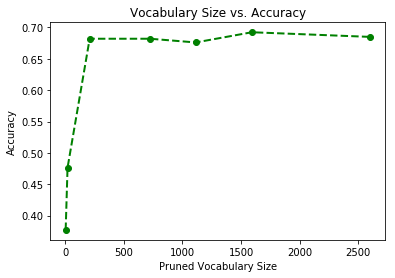

In [9]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    # Function to return non-zero weight features from coefficients array and vocabulary
    def nonZeroWeightFeatures(Coef_array, vocab, isPrint):
        NonZeroColumnIndices = np.transpose(np.nonzero(Coef_array))[:,1] # Non-zero column indices in the coefficients matrix
        NonZeroUniqueColumnIndices = np.unique(NonZeroColumnIndices) # Unique column indices in the coefficients matrix
        cust_vocab = [] # Creating an empty vocabulary to collect all non-zero wigth features
        for index in NonZeroUniqueColumnIndices: # Looping over non-zero feature indices
            cust_vocab.append(vocab[index]) # Appending the non-zero features to cust_vocabulary
        if isPrint: print('Number of non-zero weights in vocabulary: ', len(cust_vocab), '\n')
        return cust_vocab # Returning the cust_vocabulary
    
    vectorizer = CountVectorizer() # Assigning the default CountVectorizer class to a variable
    X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    vocab = vectorizer.get_feature_names() # Extracting the vocabulary (feature names) that was generated by the model on train data
    X_dev =  vectorizer.transform(dev_data) # Transforming the dev_data and storing in variable 'X_dev'
    
    # Fitting a Logistic Regression Classifier with 'l1' regularization
    LogisticReg_l1_clf =  LogisticRegression(penalty='l1', solver='liblinear', C = 0.5, tol=0.01) # Assigning LogisticRegression Class to a variable
    LogisticReg_l1_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = LogisticReg_l1_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    accuracy = LogisticReg_l1_clf.score(X_dev, dev_labels)
    print("F1 score of Logistic Regression Classifier (L1 regularization) on dev data:", F1_score, '\n', 'Accuracy: ', accuracy)      
    print('Shape of coefficients: ',LogisticReg_l1_clf.coef_.shape, '\n Number of non-zero weights for each class label: ', np.count_nonzero(LogisticReg_l1_clf.coef_, axis=1))
    nonZeroVocab = nonZeroWeightFeatures(LogisticReg_l1_clf.coef_, vocab, True)    
    
     # Fitting a Logistic Regression Classifier with 'l2' regularization
    LogisticReg_l2_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C = 0.5, tol=0.01) # Assigning LogisticRegression Class to a variable
    LogisticReg_l2_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = LogisticReg_l2_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    accuracy = LogisticReg_l2_clf.score(X_dev, dev_labels)
    print("F1 score of Logistic Regression Classifier (L2 regularization) on dev data:", F1_score,'\n', 'Accuracy: ', accuracy)   
    print('Shape of coefficients: ',LogisticReg_l2_clf.coef_.shape, '\n Number of non-zero weights for each class label: ', np.count_nonzero(LogisticReg_l2_clf.coef_, axis=1))
    nonZeroWeightFeatures(LogisticReg_l2_clf.coef_, vocab, True)
    
    # Updating vectorizer with nonZeroWeight vocabulary
    vectorizer = CountVectorizer(vocabulary = nonZeroVocab) # Assigning the default CountVectorizer class to a variable
    X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    X_dev =  vectorizer.fit_transform(dev_data) # Fit_transforming the dev_data and storing in variable 'X_dev'
     # Fitting a Logistic Regression Classifier with 'l2' regularization and non-zero weight vocabulary
    LogisticReg_l2_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C = 0.5, tol=0.01) # Assigning LogisticRegression Class to a variable
    LogisticReg_l2_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = LogisticReg_l2_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    accuracy = LogisticReg_l2_clf.score(X_dev, dev_labels)
    print("F1 score of Logistic Regression Classifier (L2 regularization & non-zero weight vocabulary) on dev data:", F1_score,'\n', 'Accuracy: ', accuracy)   
    print('Shape of coefficients: ',LogisticReg_l2_clf.coef_.shape, '\n Number of non-zero weights for each class label: ', np.count_nonzero(LogisticReg_l2_clf.coef_, axis=1), '\n')
    
    # Function to get accuracy and vocab_size for different 'C' values
    def getPrunedVocab(C, X_train, train_labels, X_dev, dev_labels):         
        vectorizer = CountVectorizer() # Assigning the default CountVectorizer class to a variable
        X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
        vocab = sorted(vectorizer.vocabulary_.keys()) # Extracting the vocabulary (feature names) that was generated by the model on train data
        LogisticReg_l1_clf =  LogisticRegression(penalty='l1', solver='liblinear', C = C, tol=0.01) # Assigning LogisticRegression Class to a variable
        LogisticReg_l1_clf.fit(X_train, train_labels) # Fitting the train data to the classifier        
        nonZeroVocab = nonZeroWeightFeatures(LogisticReg_l1_clf.coef_, vocab, False) 
        vectorizer = CountVectorizer(vocabulary = nonZeroVocab) # Assigning the default CountVectorizer class to a variable
        X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
        X_dev =  vectorizer.fit_transform(dev_data) # Fit_transforming the dev_data and storing in variable 'X_dev'
        LogisticReg_l2_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C = C, tol=0.01) # Assigning LogisticRegression Class to a variable
        LogisticReg_l2_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
        accuracy = LogisticReg_l2_clf.score(X_dev, dev_labels)        
        return accuracy, len(nonZeroVocab)
    
    C = [ 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0] # Creating a 'C' values list
    Accuracies, VocabSize = [], [] # Creating empty lists for updating later
    for c in C:
        acc, vocab_size = getPrunedVocab(c, X_train, train_labels, X_dev, dev_labels) # Calling getPrunedVocab to get accuracy and vocab_size
        Accuracies.append(acc) # Appending accuracy value to the list
        VocabSize.append(vocab_size) # Appending vocab_size to the list
    print('C values:{} \n Accuracies {}'.format(C, Accuracies))
    plt.plot(np.array(VocabSize), np.array(Accuracies), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=6) # Plotting vocab_sizes vs. Accuracies
    plt.xlabel('Pruned Vocabulary Size') # xlabel of the plot 
    plt.ylabel('Accuracy') # ylabel of the plot
    plt.title('Vocabulary Size vs. Accuracy') # title of the plot
    plt.show() # plotting the figure
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [10]:
def P7():
    ### STUDENT START ###
    # Feature extraction
    vectorizer = TfidfVectorizer() # Assigning the default TfidfVectorizer class to a variable
    X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    vocab = vectorizer.get_feature_names() # Extracting the vocabulary (feature names) that was generated by the model on train data
    X_dev =  vectorizer.transform(dev_data) # Transforming the dev_data and storing in variable 'X_dev'
    # Fitting a logistic regression classifier with 'l2' regularization
    LogisticReg_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C=100, tol = 0.01) # Assigning LogisticRegression Class to a variable
    LogisticReg_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = LogisticReg_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    print("F1 score of Logistic Regression Classifier (using TfidfVectorizer feature extraction) on dev data: {}".format(F1_score))
    
    pred_probs_dev = LogisticReg_clf.predict_proba(X_dev) # predicted probabilities of dev_data
    max_pred_probs_dev = pred_probs_dev.max(axis = 1)   # maximum probability of each example of dev_data 
    probs_correct_label = [] # Creating an empty list for correct label's probability of dev_data
    for index, value in enumerate(list(dev_labels)): # Looping over the index and values of dev_labels
        probs_correct_label.append(pred_probs_dev[index][value]) # Appending the correct label's probability value to the list
    probs_correct_label = np.array(probs_correct_label) # converting probs_correct_label list into array 
    R = max_pred_probs_dev / probs_correct_label # R-value
    max3_R_indices = list(np.argsort(R)[-3:]) # selecting maximum 3 indices values based on the R-value
    for i, v in enumerate(max3_R_indices): # Looping over the index and values of max3_R_indices
        print('\n', '[####### Documnent {}; Actual Label: {}####### \n'.format(i+1,  newsgroups_train.target_names[dev_labels[v]]), dev_data[v], '\n ####### Predicted Label: ', newsgroups_train.target_names[np.argmax(pred_probs_dev[v])], '#######]\n')
    


    ### STUDENT END ###
P7()

F1 score of Logistic Regression Classifier (using TfidfVectorizer feature extraction) on dev data: 0.7618343195266272

 [####### Documnent 1; Actual Label: alt.atheism####### 
 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...
 
 ####### Predicted Label:  talk.religion.misc #######]


 [####### Documnent 2; Actual Label: talk.religion.misc####### 
 Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 
 ####### Predicted Label:  comp.graphics #######]


 [####### Documnent 3; Actual Label: talk.religion.misc####### 
 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(e

ANSWER:

TfidfVectorizer can also be seen as first fitting a CountVectorizer and then transforming it using TfidfTransformer (text-frequency and inverse-document-frequency). Thus, TfidfVectorizer is different from CountVectorizer.

The logistic regression clasiifier (fitted using TfidfVectorizer features) makes mistakes on documents where content contains some of the 'graphics' inclined technical features such as 'file', 'text', 'ASCII', 'LaTex', 'internet' etc. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [11]:
def p_extraCredit():    
    vectorizer = TfidfVectorizer(preprocessor = better_preprocessor) # Assigning the TfidfVectorizer (with better_preprocessor) class to a variable    
    X_train = vectorizer.fit_transform(train_data) # Fit_transforming the train_data and storing in variable 'X_train'
    vocab = vectorizer.get_feature_names()  # Extracting the vocabulary (feature names) that was generated by the model on train data
    X_dev =  vectorizer.transform(dev_data) # Fit_transforming the dev_data and storing in variable 'X_dev'
    
    render_LogRegression_Weights(X_train, train_labels, vocab,  penalty='l2', solver='lbfgs', C=100)
    LogisticReg_clf =  LogisticRegression(penalty='l2', solver='lbfgs', C=100, tol=0.01) # Assigning LogisticRegression Class to a variable
    LogisticReg_clf.fit(X_train, train_labels) # Fitting the train data to the classifier
    dev_labels_pred = LogisticReg_clf.predict(X_dev) # Predicting the dev_labels using the classifier
    F1_score = metrics.f1_score(dev_labels, dev_labels_pred, average='micro')  # F1 score on dev data
    print('F1 score of Logistic Regression Classifier on dev data: {} \n'.format(F1_score))
    
    LogisticReg_clf_search = GridSearchCV(LogisticReg_clf, {'C': [0.05, 0.5, 1, 10, 100, 200],'max_iter': [100, 500, 1000] }) # Assiging the GridSearchCV Class (with alpha values)
    LogisticReg_clf_search.fit(X_train, train_labels) # fitting the tain_data and train_labels for the Grid Search
    print("The best 'params' for Logistic Regression Classifier is: {} \n The best score is: {} \n\n".format(LogisticReg_clf_search.best_params_, LogisticReg_clf_search.best_score_))

    
    
p_extraCredit()  

,Feature value,alt.atheism,comp.graphics,sci.space,talk.religion.misc
1,athe,14.485523540559678,-4.087174477236248,-5.644762510547461,-10.408658431629688
2,bobb,8.814450940002157,-1.8912427047143605,-3.5000324159843257,-4.547269636415433
3,post,8.761530109529005,-1.0629258253593872,-2.4244578818197144,-5.720283084055865
4,crim,8.69220416616352,-0.7071234840504953,-4.285142230749551,-2.1716859899456438
5,isla,7.889182464956292,-3.396881290977587,-4.6529465361755795,-3.890156680784231
6,grap,-6.433640405848972,13.296067406612826,-9.845298644751889,-5.442745958761276
7,file,-5.5972786964495596,10.90756077960695,-6.326041933411925,-6.869739654800822
8,imag,-1.3563240733501762,9.168834421701842,-5.169326398916079,-7.035510005530625
9,poin,-2.5521174196340257,7.781696288401538,-5.28729627180054,-1.1238044493445678
10,sgi,-1.6235923620515025,7.112184699402361,-3.4971476553322285,-0.6205826023848662


F1 score of Logistic Regression Classifier on dev data: 0.7485207100591716 

The best 'params' for Logistic Regression Classifier is: {'C': 100, 'max_iter': 100} 
 The best score is: 0.8082595870206489 


